In [1]:
import re
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
def parseLogFile(filename, variable_count):
    with open(filename, 'r') as f:
        log_content = (f.read())

    regex = r"([0-9.\+]+)s (.+:) " + ', '.join([r"([\w]+=[0-9.\-\+]+)[\w]+"] * variable_count)
    subst = "time=\\1,\\" + ",\\".join([str(x) for x in list(range(3, 3 + variable_count))])

    result = re.sub(regex, subst, log_content, 0, re.MULTILINE)

    if result:
        result = result.replace('+', '')\
                       .replace('=', '":')\
                       .replace(',', ',"')\
                       .replace('\n', '},\n{"')
        result = '[{"' + result
        result = result[:-4] + ']'
        return ast.literal_eval(result)

## Kunisch Rural

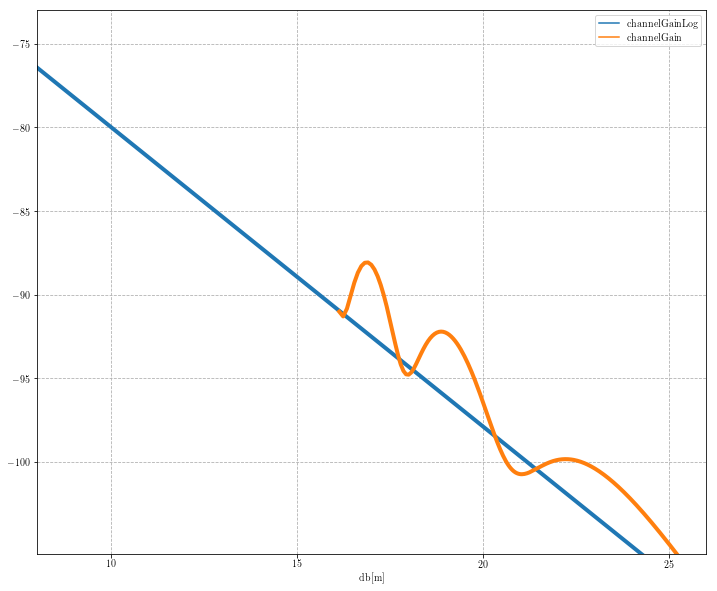

In [41]:
df = pd.DataFrame(parseLogFile('output/kunisch_rural.log', 4))
df['channelGain'] = df['rxPower'] - df['txPower']
df['db[m]'] = 10 * np.log10(df['distance'])

df['channelGainLog'] = -62.1 + 10 * (-1.79) * np.log10(df['distance'])

df['channelGain'] = df['channelGain'] + 1.1

# ax = df.query('distance >= 33 and distance <= 400')\
#        .plot(x='distance', y='channelGain', logx=True,
#              yticks=[-75, -80, -85, -90, -95, -100],
#              xticks=[10, 32, 100, 316],
#              figsize=(12, 10))

ax = df.query('distance >= 5 and distance <= 400')\
       .plot(x='db[m]', y='channelGainLog',
             yticks=[-75, -80, -85, -90, -95, -100],
             xticks=[10, 15, 20, 25],
             figsize=(12, 10))

ax = df.query('distance >= 41 and distance <= 400')\
       .plot(x='db[m]', y='channelGain',
             yticks=[-75, -80, -85, -90, -95, -100],
             xticks=[10, 15, 20, 25],
             xlim=[8, 26],
             ylim=[-105.5, -73],
             figsize=(12, 10),
             ax=ax)


ax.grid(True,which="both",ls="--")
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=4)

## Kunisch Highway

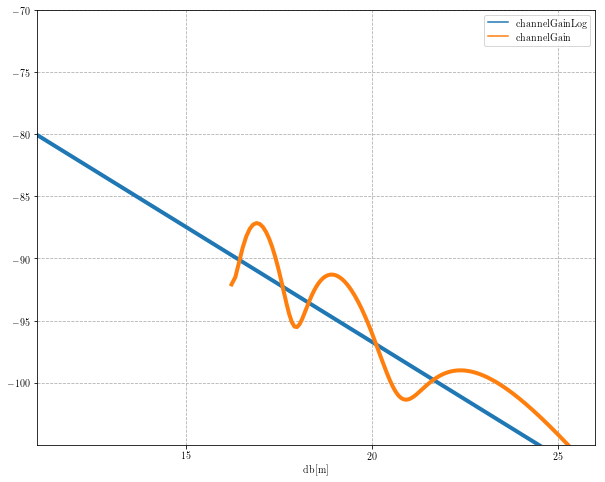

In [42]:
df = pd.DataFrame(parseLogFile('output/kunisch_highway.log', 4))
df['channelGain'] = df['rxPower'] - df['txPower']
df['db[m]'] = 10 * np.log10(df['distance'])

df['channelGainLog'] = -59.7 + 10 * (-1.85) * np.log10(df['distance'])

df['channelGain'] = df['channelGain'] + 1

# ax = df.query('distance >= 33 and distance <= 400')\
#        .plot(x='distance', y='channelGain', logx=True,
#              yticks=[-75, -80, -85, -90, -95, -100],
#              xticks=[10, 32, 100, 316],
#              figsize=(12, 10))

ax = df.query('distance >= 12 and distance <= 400')\
       .plot(x='db[m]', y='channelGainLog',
             yticks=[-75, -80, -85, -90, -95, -100],
             xticks=[10, 15, 20, 25],
             figsize=(12, 10))

ax = df.query('distance >= 41.1 and distance <= 400')\
       .plot(x='db[m]', y='channelGain',
             yticks=[-70, -75, -80, -85, -90, -95, -100],
             xticks=[15, 20, 25],
             xlim=[11, 26],
             ylim=[-105, -70],
             figsize=(10, 8),
             ax=ax)


ax.grid(True,which="both",ls="--")
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=4)

## Kunisch Urban

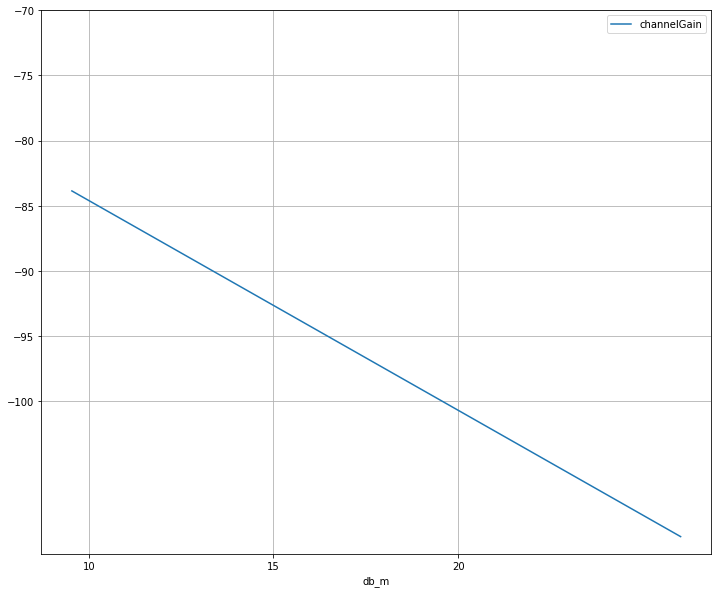

In [38]:
df = pd.DataFrame(parseLogFile('kunisch_urban.log', 4))
df['channelGain'] = df['rxPower'] - df['txPower']
df['db[m]'] = 10 * np.log10(df['distance'])
df.query('distance >= 9 and distance <= 400')\
  .plot(x='db[m]', y='channelGain', grid=True,
        yticks=[-70, -75, -80, -85, -90, -95, -100],
        xticks=[10, 15, 20],
        figsize=(12, 10))

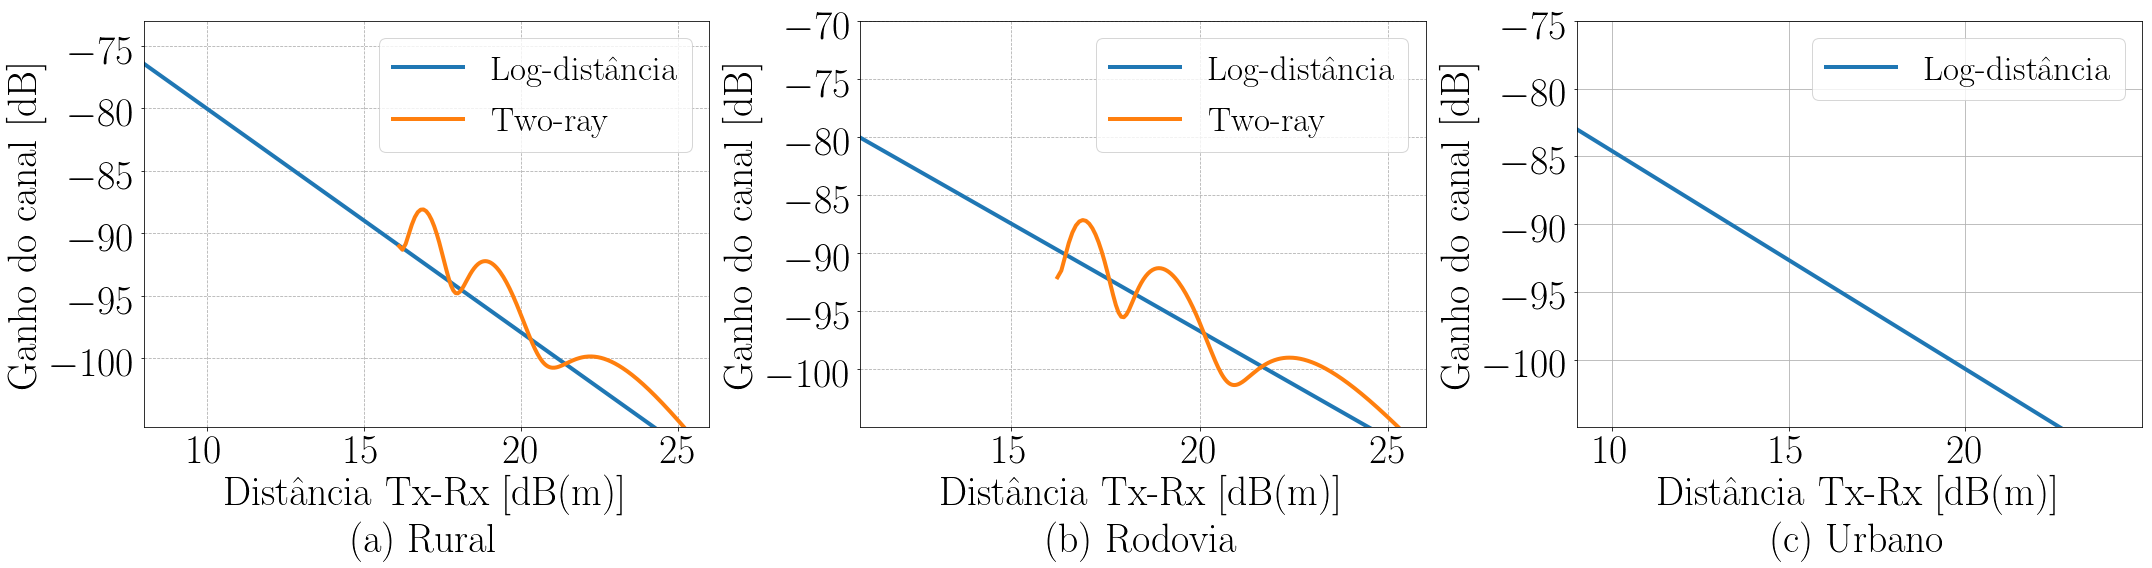

In [89]:
fontsize=40

fig, axes = plt.subplots(1, 3, figsize=(30, 8))
for i in range(len(axes)):
    ax = axes[i]
    if i == 0:       
        df = pd.DataFrame(parseLogFile('output/kunisch_rural.log', 4))
        df['channelGain'] = df['rxPower'] - df['txPower']
        df['db[m]'] = 10 * np.log10(df['distance'])

        df['channelGainLog'] = -62.1 + 10 * (-1.79) * np.log10(df['distance'])

        df['channelGain'] = df['channelGain'] + 1.1

        df.query('distance >= 5 and distance <= 400')\
               .plot(x='db[m]', y='channelGainLog',
                     yticks=[-75, -80, -85, -90, -95, -100],
                     xticks=[10, 15, 20, 25],
                     ax=ax)

        ax = df.query('distance >= 41 and distance <= 400')\
               .plot(x='db[m]', y='channelGain',
                     yticks=[-75, -80, -85, -90, -95, -100],
                     xticks=[10, 15, 20, 25],
                     xlim=[8, 26],
                     ylim=[-105.5, -73],
                     ax=ax)

        ax.set_xlabel('Distância Tx-Rx [dB(m)]\n(a) Rural', fontsize=fontsize)
        ax.grid(True,which="both",ls="--")
        for i, l in enumerate(ax.lines):
            plt.setp(l, linewidth=4)
    
    elif i == 1:
        df = pd.DataFrame(parseLogFile('output/kunisch_highway.log', 4))
        df['channelGain'] = df['rxPower'] - df['txPower']
        df['db[m]'] = 10 * np.log10(df['distance'])

        df['channelGainLog'] = -59.7 + 10 * (-1.85) * np.log10(df['distance'])

        df['channelGain'] = df['channelGain'] + 1

        df.query('distance >= 12 and distance <= 400')\
               .plot(x='db[m]', y='channelGainLog',
                     yticks=[-75, -80, -85, -90, -95, -100],
                     xticks=[10, 15, 20, 25],
                     ax=ax)

        df.query('distance >= 41.1 and distance <= 400')\
               .plot(x='db[m]', y='channelGain',
                     yticks=[-70, -75, -80, -85, -90, -95, -100],
                     xticks=[15, 20, 25],
                     xlim=[11, 26],
                     ylim=[-105, -70],
                     ax=ax)

        ax.set_xlabel('Distância Tx-Rx [dB(m)]\n(b) Rodovia', fontsize=fontsize)
        ax.grid(True,which="both",ls="--")
        for i, l in enumerate(ax.lines):
            plt.setp(l, linewidth=4)
    else:
        df = pd.DataFrame(parseLogFile('output/kunisch_urban.log', 4))
        df['channelGain'] = df['rxPower'] - df['txPower']
        df['db[m]'] = 10 * np.log10(df['distance'])
        df.query('distance >= 5 and distance <= 400')\
          .plot(x='db[m]', y='channelGain', grid=True,
                yticks=[-70, -75, -80, -85, -90, -95, -100],
                xticks=[10, 15, 20],
                xlim=[9, 25],
                ylim=[-105, -75],
                ax=ax)
        for i, l in enumerate(ax.lines):
            plt.setp(l, linewidth=4)
    
        ax.set_xlabel('Distância Tx-Rx [dB(m)]\n(c) Urbano', fontsize=fontsize)
    
    ax.set_ylabel('Ganho do canal [dB]', fontsize=fontsize)
    ax.legend(['Log-distância', 'Two-ray'], fontsize=fontsize-5)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
    
fig.tight_layout()
plt.savefig('two_ray_validation.eps')

### Karedal

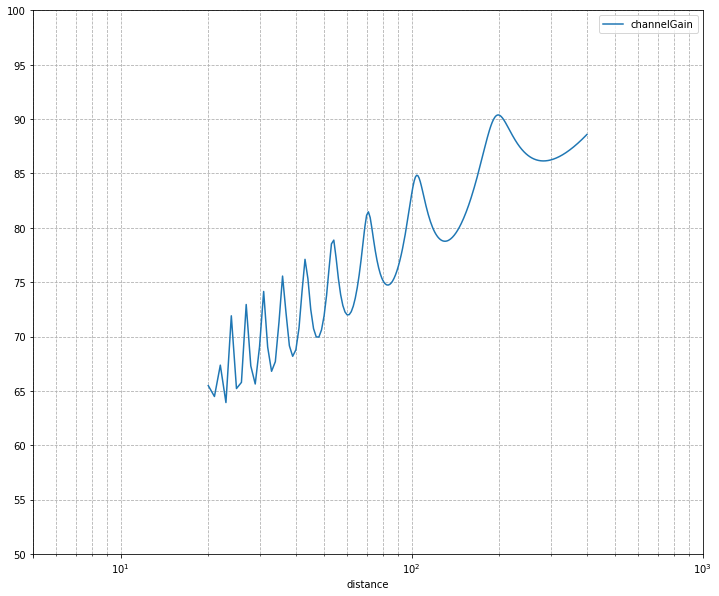

In [43]:
df = pd.DataFrame(parseLogFile('output/teste_karedal.log', 4))
df['channelGain'] = -(df['rxPower'] - df['txPower'])
df['db_m'] = 10 * np.log10(df['distance'])
ax = df.query('distance >= 20 and distance <= 400')\
       .plot(x='distance', y='channelGain', logx=True,
             yticks=list(range(100, 45, -5)),
             xticks=[5, 10, 100, 1000],
             figsize=(12, 10))
ax.grid(True,which="both",ls="--")

## Dual-log

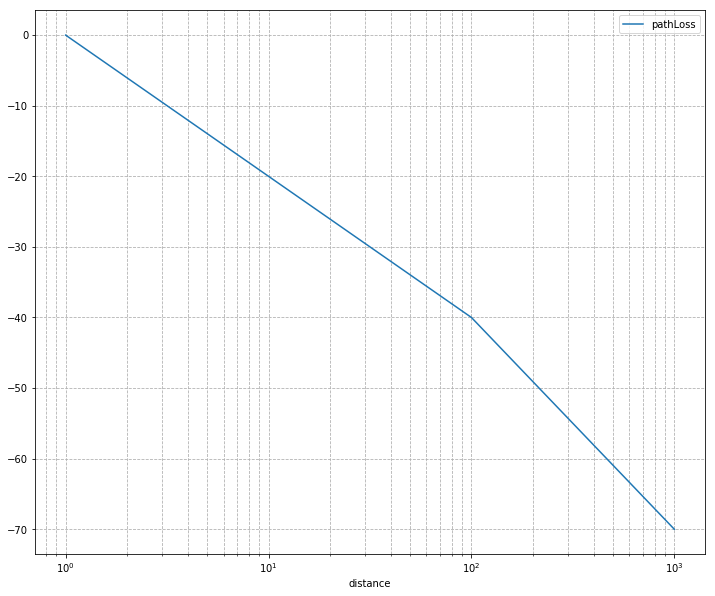

In [6]:
df = pd.DataFrame(parseLogFile('output/dual_log_debug.log', 4))
df['pathLoss'] = (df['rxPower'] - df['txPower'])
df['db_m'] = 10 * np.log10(df['distance'])
ax = df.plot(x='distance', y='pathLoss', logx=True,
             figsize=(12, 10))
ax.grid(True,which="both",ls="--")

## Abbas - Highway LOS

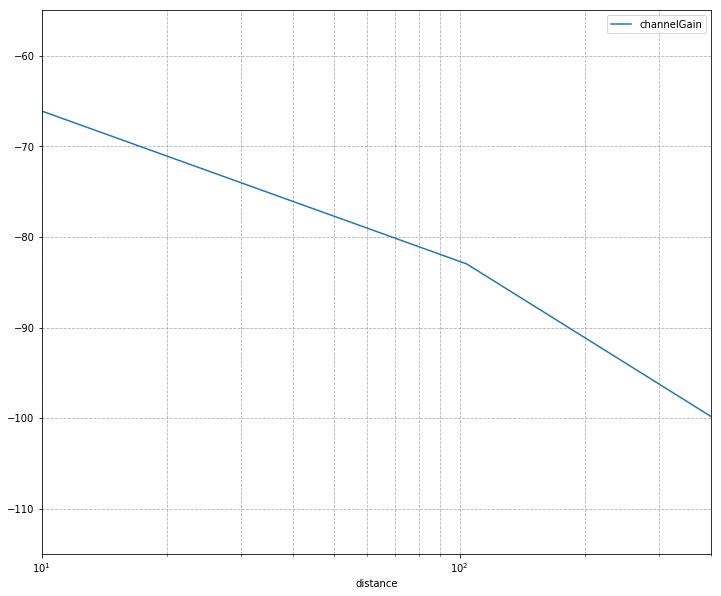

In [12]:
df = pd.DataFrame(parseLogFile('output/abbas_highway_los.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower'])
df['db_m'] = 10 * np.log10(df['distance'])
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
             yticks=[-60, -70, -80, -90, -100, -110],
             xticks=[10, 100],
             xlim=[10, 400],
             ylim=[-115, -55],
             figsize=(12, 10))
ax.grid(True,which="both",ls="--")

## Abbas - Urban LOS e OLOS

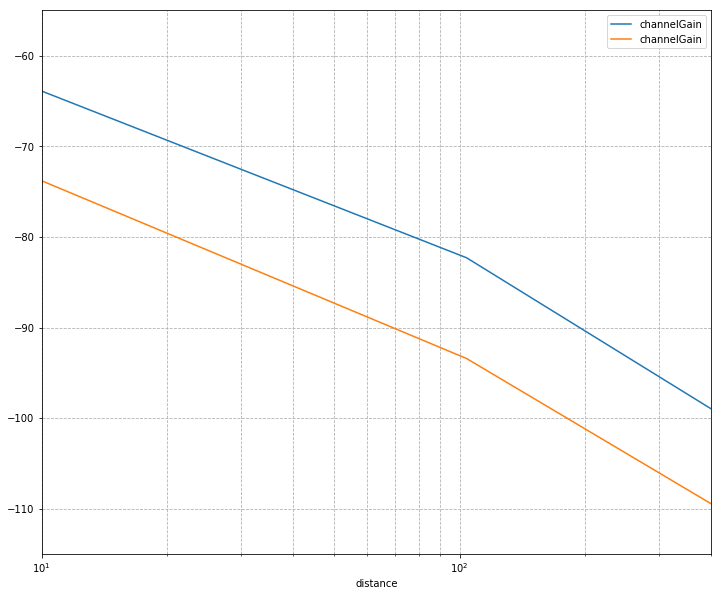

In [22]:
df = pd.DataFrame(parseLogFile('output/abbas_urban_los.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower'])
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
             yticks=[-60, -70, -80, -90, -100, -110],
             xticks=[10, 100],
             xlim=[10, 400],
             ylim=[-115, -55],
             figsize=(12, 10))

df = pd.DataFrame(parseLogFile('output/abbas_urban_olos.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower']) - 1.5
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
             yticks=[-60, -70, -80, -90, -100, -110],
             xticks=[10, 100],
             xlim=[10, 400],
             ylim=[-115, -55],
             figsize=(12, 10),
             ax=ax)

ax.grid(True,which="both",ls="--")

In [25]:
df.query('distance == 10')['channelGain']

990   -73.8
Name: channelGain, dtype: float64

In [28]:
list(range(-40, -150, -10))

[-40, -50, -60, -70, -80, -90, -100, -110, -120, -130, -140]

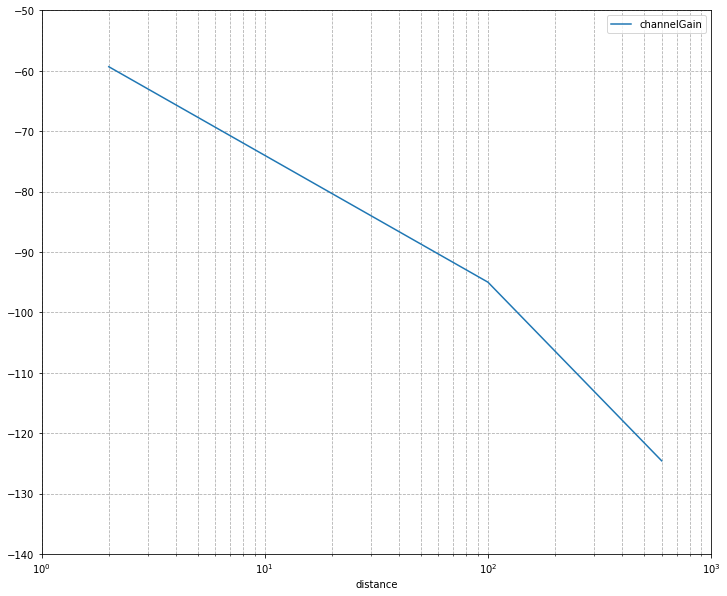

In [33]:
df = pd.DataFrame(parseLogFile('output/cheng_suburban_1.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower']) - 53
# ax = df.plot(x='distance', y='channelGain', logx=True,
#              figsize=(12, 10))
ax = df.query('distance >= 2 and distance <= 600')\
       .plot(x='distance', y='channelGain', logx=True,
             yticks=list(range(-50, -150, -10)),
             xticks=[1, 10, 100, 1000],
             xlim=[1, 1000],
             ylim=[-140, -50],
             figsize=(12, 10))
ax.grid(True,which="both",ls="--")

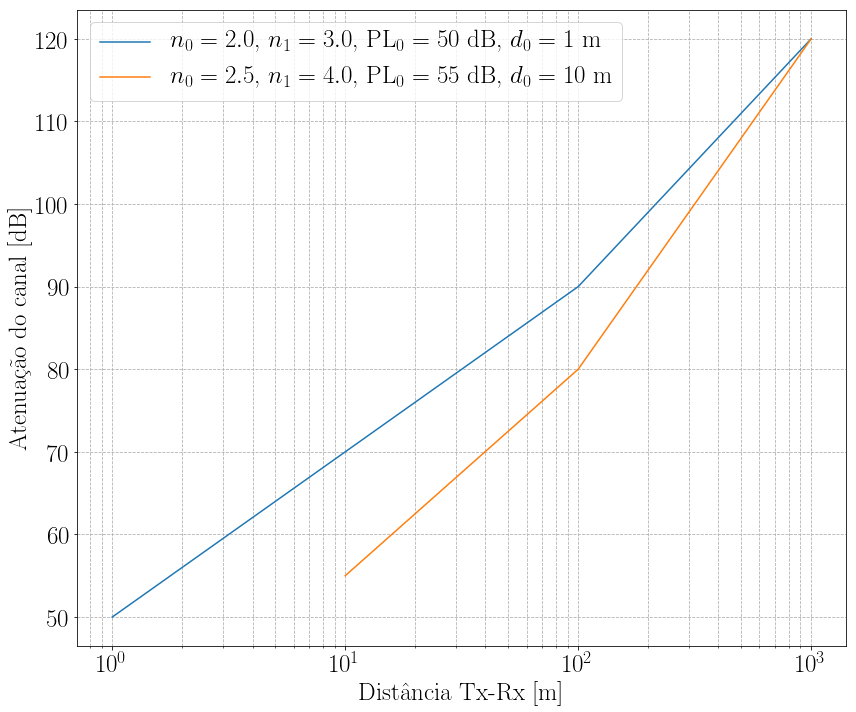

In [92]:
df = pd.DataFrame(parseLogFile('output/dual_log_debug_1.log', 4))
df['channelGain'] = -(df['rxPower'] - df['txPower'])
# ax = df.plot(x='distance', y='channelGain', logx=True,
#              figsize=(12, 10))
ax = df.plot(x='distance', y='channelGain', logx=True,
             figsize=(12, 10))

df = pd.DataFrame(parseLogFile('output/dual_log_debug_2.log', 4))
df['channelGain'] = -(df['rxPower'] - df['txPower'])
# ax = df.plot(x='distance', y='channelGain', logx=True,
#              figsize=(12, 10))
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
             figsize=(12, 10),
             ax=ax)
ax.grid(True,which="both",ls="--")

ax.legend(['$n_0 = 2.0$, $n_1 = 3.0$, PL$_0 = 50$ dB, $d_0 = 1$ m', 
           '$n_0 = 2.5$, $n_1 = 4.0$, PL$_0 = 55$ dB, $d_0 = 10$ m'], 
          fontsize=25)
ax.set_xlabel('Distância Tx-Rx [m]', fontsize=25)
ax.set_ylabel('Atenuação do canal [dB]', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)

fig = plt.gcf()
fig.tight_layout()
plt.savefig('dual_log_debug.eps')

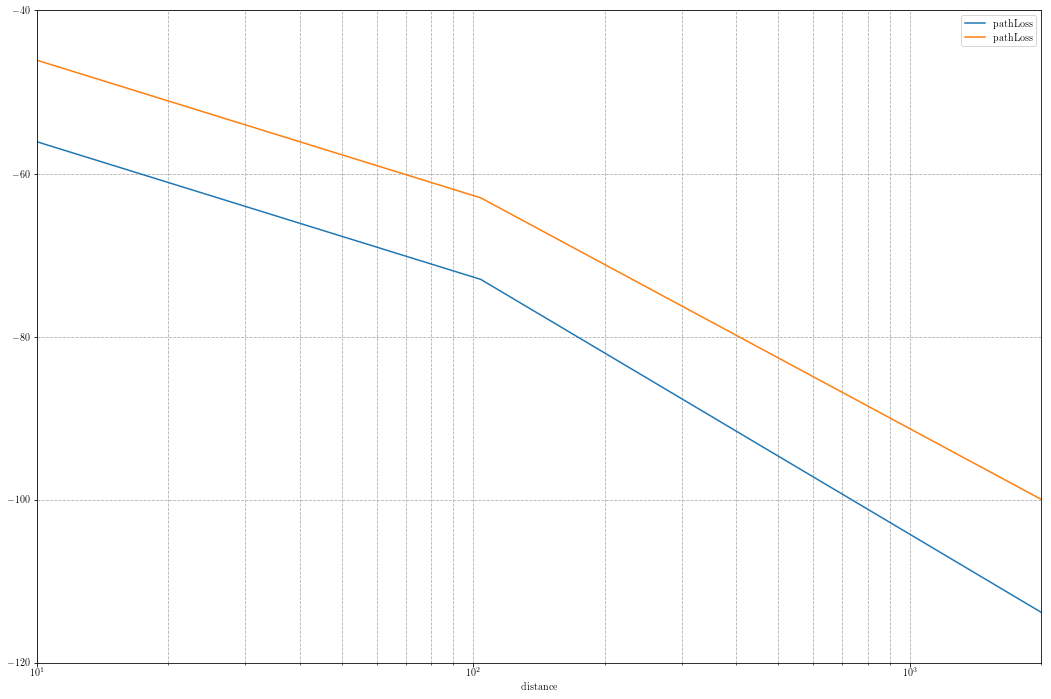

In [156]:
pl_0 = 76.1
n_0 = 1.66
n_1 = 3.18
d_0 = 10.0
d_1 = 104.0

distanceVector = np.linspace(1, 2000, 2000)
resultVector = np.zeros(distanceVector.shape)

mask = (distanceVector >= d_0) & (distanceVector <= d_1)
resultVector[mask] = pl_0 + 10*n_0*np.log10(distanceVector[mask]/d_0)
mask = (distanceVector > d_1)
resultVector[mask] = pl_0 + 10*n_0*np.log10(d_1/d_0) + 10*n_1*np.log10(distanceVector[mask]/d_1)

df = pd.DataFrame({'distance': distanceVector, 'pathLoss': resultVector})
df['pathLoss'] = - df['pathLoss'] + 20
ax = df.query('distance >= 10')\
       .plot('distance', 'pathLoss', logx=True,
             yticks=[-40, -60, -80, -100, -120],
             xlim=[10, 2000],
             figsize=(18,12))

pl_0 = 66.1
n_0 = 1.66
n_1 = 2.88
d_0 = 10.0
d_1 = 104.0

distanceVector = np.linspace(1, 2000, 2000)
resultVector = np.zeros(distanceVector.shape)

mask = (distanceVector >= d_0) & (distanceVector <= d_1)
resultVector[mask] = pl_0 + 10*n_0*np.log10(distanceVector[mask]/d_0)
mask = (distanceVector > d_1)
resultVector[mask] = pl_0 + 10*n_0*np.log10(d_1/d_0) + 10*n_1*np.log10(distanceVector[mask]/d_1)

df = pd.DataFrame({'distance': distanceVector, 'pathLoss': resultVector})
df['pathLoss'] = - df['pathLoss'] + 20
ax = df.query('distance >= 10')\
       .plot('distance', 'pathLoss', logx=True,
             yticks=[-40, -60, -80, -100, -120],
             xlim=[10, 2000],
             figsize=(18,12),
             ax=ax)

ax.grid(True,which="both",ls="--")

## Todos

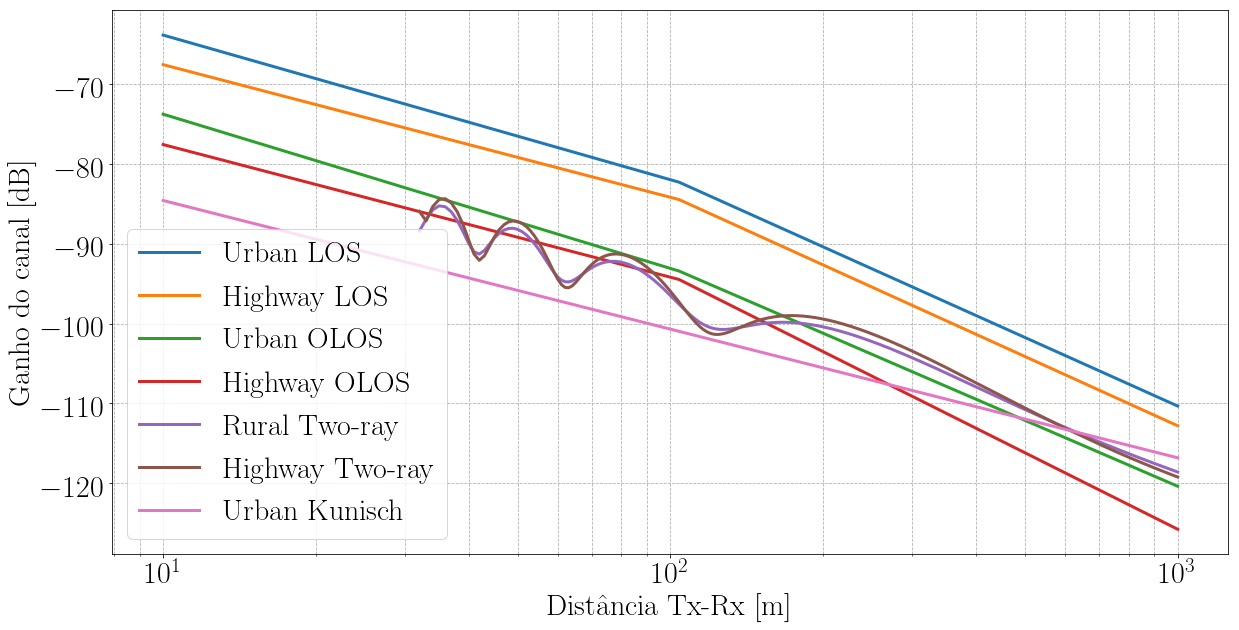

In [22]:
fontsize=30

df = pd.DataFrame(parseLogFile('output/abbas_urban_los.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower'])
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
#              yticks=[-60, -70, -80, -90, -100, -110],
#              xticks=[10, 100],
#              xlim=[10, 400],
#              ylim=[-115, -55],
             figsize=(20, 10))

df = pd.DataFrame(parseLogFile('output/abbas_highway_los.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower']) - 1.5
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
#              yticks=[-60, -70, -80, -90, -100, -110],
#              xticks=[10, 100],
#              xlim=[10, 400],
#              ylim=[-115, -55],
             ax=ax)

df = pd.DataFrame(parseLogFile('output/abbas_urban_olos.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower']) - 1.5
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
#              yticks=[-60, -70, -80, -90, -100, -110],
#              xticks=[10, 100],
#              xlim=[10, 400],
#              ylim=[-115, -55],
             ax=ax)



df = pd.DataFrame(parseLogFile('output/abbas_highway_olos.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower']) - 1.5
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
#              yticks=[-60, -70, -80, -90, -100, -110],
#              xticks=[10, 100],
#              xlim=[10, 400],
#              ylim=[-115, -55],
             ax=ax)

df = pd.DataFrame(parseLogFile('output/kunisch_rural.log', 4))
df['channelGain'] = df['rxPower'] - df['txPower']
df['channelGain'] = df['channelGain'] + 1.1

df.query('distance >= 32')\
  .plot(x='distance', y='channelGain', logx=True,
#             yticks=[-75, -80, -85, -90, -95, -100],
#             xticks=[10, 15, 20, 25],
        ax=ax)

df = pd.DataFrame(parseLogFile('output/kunisch_highway.log', 4))
df['channelGain'] = df['rxPower'] - df['txPower']
df['channelGain'] = df['channelGain'] + 1

df.query('distance >= 32')\
  .plot(x='distance', y='channelGain', logx=True,
#             yticks=[-75, -80, -85, -90, -95, -100],
#             xticks=[10, 15, 20, 25],
        ax=ax)

df = pd.DataFrame(parseLogFile('output/kunisch_urban.log', 4))
df['channelGain'] = df['rxPower'] - df['txPower']
df.query('distance >= 10')\
  .plot(x='distance', y='channelGain', logx=True,
#         yticks=[-70, -75, -80, -85, -90, -95, -100],
#         xticks=[10, 15, 20],
#         xlim=[9, 25],
#         ylim=[-105, -75],
        ax=ax)

for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=3)

ax.legend(['Urban LOS', 
           'Highway LOS',
           'Urban OLOS',
           'Highway OLOS',
           'Rural Two-ray',
           'Highway Two-ray',
           'Urban Kunisch'],
          fontsize=fontsize)
ax.grid(True,which="both",ls="--")
ax.set_xlabel('Distância Tx-Rx [m]', fontsize=fontsize)
ax.set_ylabel('Ganho do canal [dB]', fontsize=fontsize)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)